In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *



## generating file with examples for ins1 prediction power within samples:

In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

threshLength=20
sample_list=['HIP13505','HIP02848']
train_fraction_list=[0.8]
#'HIP02848'



samplesList=[]
sampleLengthList=[]
TrainFracsList=[]
rExpToObsCorrelList=[]
pExpToObsCorrelList=[]
figExpToObsCorrelList=[]
axExpToObsCorrelList=[]       

fig1, ((ax1, ax3,ax5,ax7),(ax2,ax4,ax6,ax8))= plt.subplots(nrows=2,ncols=4,figsize=(13,5),sharex=True,sharey=True)
fig1.suptitle('Ins1 sequence frequency - correlation between expected and observed values', fontsize=18)
axList=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0


for sample_name in sample_list:
    for train_fraction in train_fraction_list:
        print sample_name
        print train_fraction
        if count<9:
            axB=axList[count]
        else:
            axB=None
        figExpToObsCorrel,axExpToObsCorrel,rExpToObsCorrel,pExpToObsCorrel,sample_length=calc_plot_save_modelParamPrediction(
            sample_name,threshLength,train_fraction,axB)
        samplesList.append(sample_name)
        sampleLengthList.append(sample_length)
        TrainFracsList.append(train_fraction)
        rExpToObsCorrelList.append(rExpToObsCorrel)
        pExpToObsCorrelList.append(pExpToObsCorrel)
        figExpToObsCorrelList.append(figExpToObsCorrel)
        axExpToObsCorrelList.append(axExpToObsCorrel)
        count+=1

fig1.subplots_adjust(left=0.09, right=0.98, top=0.84, wspace=0.08,hspace=0.32)
fig1.text(0.5, 0.02, 'Expected Frequency (log10)', ha='center')
fig1.text(0.02, 0.5, 'Observed Frequency (log10)', va='center', rotation='vertical')
ins1predictionStrengthDF=pd.DataFrame({'Sample': samplesList, '# nonProd unique seqeunces':sampleLengthList,
                                      'train set fraction':TrainFracsList, 
                                       'expected to observed frequency correlation r':rExpToObsCorrelList,
                                      'expected to observed frequency correlation p':pExpToObsCorrelList})


ins1predictionStrengthDF

figFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Prediction_Correlation_Examples_ins1_ %s' %cdate
fig1.savefig(figFile, dpi=300)        
        


HIP13505
0.8


TypeError: calc_plot_save_modelParamPrediction() takes exactly 5 arguments (4 given)

# running ins1 prediction *within samples* on all samples:
the function is defined and run in eclipse: sufficient statistics scripts.py (using @cache on disk)
the resulting dfs should be concatenate into one df:

In [ ]:
filenames = [f for f in listdir('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/calc_predictionPower_allSamples') if isfile(join('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/calc_predictionPower_allSamples', f))]
#filenames = [datafile for datafile in filenames if datafile.startswith ('HIP') and datafile.endswith('.csv')]
#df_names=[re.sub('.csv', '', datafile) for datafile in filenames]
print len(filenames)

In [ ]:
ins1predict_df_list=[]
for file_name in filenames:
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/calc_predictionPower_allSamples/%s' %file_name, 'rb') as f:
        ins1predict_df=pickle.load(f)
    f.close()
    ins1predict_df_list.append(ins1predict_df)
print len(ins1predict_df_list)

In [ ]:
ins1predict_df_all=pd.concat(ins1predict_df_list)

In [ ]:
ins1predict_df_all

In [ ]:
def concat_summarizing_dfs(dfs_folder):
    filenames = [f for f in listdir(dfs_folder) if isfile(join(dfs_folder, f))]
    print ('number of dfs in directory: %s' %len(filenames))
    
    df_list=[]
    for file_name in filenames:
        with open('%s/%s' %(dfs_folder, file_name), 'rb') as f:
            current_df=pickle.load(f)
        f.close()
        df_list.append(current_df)
    print ('the length of df list is %s' %len(df_list))
           
    df_all=pd.concat(df_list)
           
    return df_all


In [ ]:
from MyFunctionsShani import *

In [ ]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/calc_predictionPower_allSamples'
ins1predict_df_all_2=concat_summarizing_dfs(dfs_folder)
ins1predict_df_all_2


# predicting ins1 in a sample using all other samples:

In [ ]:

sample_df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" %sample_name) 
sample_df_non_prod = sample_df[sample_df['sequenceStatus'] != 'In']

In [ ]:
print len(sample_df_non_prod)

In [ ]:
noIns1=sample_df_non_prod[sample_df_non_prod['n1Insertion']==0]
print len(noIns1)

In [ ]:
53170-5130

In [ ]:
#generating a list of all ins1 sequences and length in ALL samples:

df_file_names,samples_with_df=get_sample_with_dfs()

n1seq_sample_df_list=[]
count=1
for sample_name in samples_with_df:
    print count
    n1seq_sample_df=genIns1seqDF(sample_name)
    n1seq_sample_df['Sample']=sample_name
    n1seq_sample_df_list.append(n1seq_sample_df)
    #print len(n1seq_sample_df)
    count+=1

Alln1SeqsDF=pd.concat(n1seq_sample_df_list)
print len(Alln1SeqsDF)


    
    

In [ ]:
Alln1SeqsDF.head()

In [ ]:
print len(Alln1SeqsDFsmall.index.unique())

In [ ]:
#reducing the list size:

Alln1SeqsDFsmall=Alln1SeqsDF.set_index('Sample')
Alln1SeqsDFsmall.index=Alln1SeqsDFsmall.index.str.replace("HIP","")


In [ ]:
Alln1SeqsDFsmall.head()

In [ ]:
#saving this list:

pickleFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/Alln1SeqsDFsmall'
Alln1SeqsDFsmall.to_pickle(pickleFile)


#writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/Alln1SeqsDFsmall.xlsx' 
#Alln1SeqsDFsmall.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)## saving the correct Reg table to pickles and excel:

In [ ]:
def predictIns1outSampleBasedOnAllOthers(sample_name):
    print sample_name
    
    
    shortSampleName=sample_name.replace("HIP","")
    
    # generating train set and test set for each sample (the test set is all sequences in a sample and the train set is 
    # sequences from all other samples)
    
    print 'generating train and test sets...'
    trainSet=Alln1SeqsDFsmall[Alln1SeqsDFsmall.index!=shortSampleName]
    testSet=Alln1SeqsDFsmall[Alln1SeqsDFsmall.index==shortSampleName]
    
    print len(trainSet.index.unique())
    print len(testSet.index.unique())
    
    threshLength=20
    # calculating probs for the train set (long!!)
    
    print 'calculating probs for the train set (long!!)...'
    dinucNormDFDict_train,nt1FreqsDictDict_train,lengthCount_train=genSeqProbsForLengths(trainSet, threshLength)
    
    # calculating probs for the test set
    print 'calculating probs for the test set...'
    dinucNormDFDict_tethreshLengthst,nt1FreqsDictDict_test,lengthCount_test=genSeqProbsForLengths(testSet, threshLength)
   

    # comparing predicted and observed frequencies for all ins1 sequence in the sample:

    print 'comparing predicted and observed frequencies for all ins1 sequence in the sample (long!)...'
    dinucNormDFDict_test=dinucNormDFDict_tethreshLengthst

    TestSeqList=[]
    calcFreqTrainList=[]
    calcFreqTestList=[]
    TestSeqFreqLogList=[]

    for TestSeq in list(testSet['sequence']):
        #print TestSeq
        calcFreqTrain=calc_ins1Seq_prob(TestSeq,threshLength,nt1FreqsDictDict_train,dinucNormDFDict_train,lengthCount_train)
        calcFreqTest=calc_ins1Seq_prob(TestSeq,threshLength,nt1FreqsDictDict_test,dinucNormDFDict_test,lengthCount_test)
        TestSeqFreqLog=calc_observedFractLog(TestSeq,testSet)
        TestSeqList.append(TestSeq)
        calcFreqTrainList.append(calcFreqTrain)
        calcFreqTestList.append(calcFreqTest)
        TestSeqFreqLogList.append(TestSeqFreqLog)

    ins1SeqProbsCompare=pd.DataFrame({'sequence': TestSeqList, 'calcFreqTrain':calcFreqTrainList, 'calcFreqTest':calcFreqTestList,
                                     'TestSeqFreqLog':TestSeqFreqLogList})
    ins1SeqProbsCompare=ins1SeqProbsCompare.drop_duplicates()
    
    # save the expected to observed freqs dataframe to pickle:
    
    print 'savings dataframes and dictionaries...'
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/expObsFreqDF_%s_Leave1Out' 
              %sample_name , 'wb') as f:
        pickle.dump(ins1SeqProbsCompare,f)
    f.close()
    
    # save the calculated probs to pickles
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/dinucNormDFDict_train_no%s' %sample_name, 'wb') as file1:
        pickle.dump(dinucNormDFDict_train, file1)
    file1.close()

    with open ('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/nt1FreqsDictDict_train_no%s' %sample_name, 'wb') as file2:
        pickle.dump(nt1FreqsDictDict_train, file2)
    file2.close()

    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/lengthCount_train_no%s' %sample_name, 'wb') as file3:
         pickle.dump(lengthCount_train, file3)
    file3.close()
    
    
    print 'calculatine exp to obs correlations:...'
    threshold=calc_observed_value_thresh(testSet) ##define the value which represtn two repeats in the test set:
    ins1SeqProbsCompareNoDupThresh=ins1SeqProbsCompare[(ins1SeqProbsCompare['TestSeqFreqLog']>=threshold)|
                                                       (ins1SeqProbsCompare['calcFreqTrain']>=threshold)]
    ## define parameters and plot correlation images with p and r values :
    #df=ins1SeqProbsCompare
    
    df=ins1SeqProbsCompareNoDupThresh
    
    import time
    cdate=str(time.strftime("%d%m%Y"))
    cdate

    from scipy.stats import pearsonr,spearmanr
    x_var='calcFreqTrain'
    y_var='TestSeqFreqLog'
    x=df[x_var]
    y=df[y_var]


    nx=np.isnan(x)
    ny=np.isnan(y)
    n=nx+ny
    newx=list(x[~n])
    newy=list(y[~n])
    r,p = pearsonr(newx,newy)
    
        
    return r,p

    

In [ ]:
def ins1Prediction_AllSample(min_sample, max_sample):
    import time
    cdate=str(time.strftime("%d%m%Y"))
    cdate
    
    print min_sample, max_sample
    if max_sample>587:
        max_sample=587
    n=1
    df_file_names,samples_with_df=get_sample_with_dfs()
    
    threshLength=20
    sample_list=samples_with_df[min_sample:max_sample]
    train_fraction_list=[0.8]
      
    samplesList=[]
    rList=[]
    pList=[]
       
    
    for sample_name in sample_list:
        r,p=predictIns1outSampleBasedOnAllOthers(sample_name)
        samplesList.append(sample_name)
        rList.append(r)
        pList.append(p)
        
        
    ins1predictionStrengthDF_AllSamples=pd.DataFrame({'Sample': samplesList,
                                       'expected to observed frequency correlation r':r,
                                      'expected to observed frequency correlation p':p})
    
    return ins1predictionStrengthDF_AllSamples

# Do Age, gender and/or sample size affect ins1 prediction power?

concatenating all dfs that include ins1 prediction power for all samples
calculating pearson are with age and sample size
calculating t-test p-value for gender

In [ ]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/calc_predictionPower_allSamples/'
ins1predictionDF_all=concat_summarizing_dfs(dfs_folder)
    

In [ ]:
ins1predictionDF_all.head()

In [ ]:
ins1predictionDF_all=ins1predictionDF_all.set_index('Sample')
ins1predictionDF_all.head()

In [ ]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/ins1predictionDF_all',"wb" ) as f:
    pickle.dump(ins1predictionDF_all,f)
f.close()


writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/ins1predictionDF_all.xlsx'
ins1predictionDF_all.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)

In [ ]:
#downloading file with correlation values for all samples (within sample prediction!) merged with sample tags:

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/ins1predictionDF_all_withTagsFull.xlsx'

ins1predictionDF_all_withTagsFull=pd.read_excel(file1)

In [106]:
def draw_correlation_scatter_onePlotperFigure(x, y, figsize = (3, 3), xticks=None, yticks=None,\
                             xlim = None, ylim = None, r = None, ms=4, logd = False,\
                             xlab = None, ylab = None, filename = None, title = None,
                             color = "#a0a0a0", grid = True, dpi = 800, xticklabels = None,
                             xticklabelsSize=None, yticklabelsSize=None, xticksAlign=None,
                             contour = False, **figkwargs):
    from scipy.stats import pearsonr
    fig = plt.figure(figsize = figsize, dpi = dpi)
    axB = fig.add_subplot(111)
    if contour:
        print "Contour plot are experimental here"
        axB.hist2d(x,y,bins = 40,norm=LogNorm())
    else:
        axB.plot(x, y, 'o', color = color, ms=ms, **figkwargs)
    if logd:
        axB.set_xscale('log',basex=2)
        axB.set_yscale('log',basey=2)
    if xticks is not None:
        axB.set_xticks(xticks)
        axB.set_xticklabels(xticks)
    if xticklabels is not None:
        axB.set_xticklabels(xticklabels)
    if xticklabelsSize is not None:
        axB.tick_params(axis='x', labelsize=xticklabelsSize)
        #axB.set_xticklabels(xticklabels, fontsize=xticklabelsSize)
    if yticklabelsSize is not None:
        axB.tick_params(axis='y', labelsize=yticklabelsSize)
        #axB.set_yticklabels(yticklabels, fontsize=yticklabelsSize)
    if xticksAlign is not None:
        axB.tick_params(axis='x', direction='out')
    if yticks is not None:
        axB.set_yticks(yticks)
        axB.set_yticklabels(yticks)
    if xlim is not None:
        axB.set_xlim(xlim)
    if ylim is not None:
        axB.set_ylim(ylim)
    if r is not None: 
        if r == 'pearson':
            nx=np.isnan(x)
            ny=np.isnan(y)
            n=nx+ny
            newx=list(x[~n])
            newy=list(y[~n])
            r,p = pearsonr(newx,newy)
            axB.text(0.01,0.99,"r=%.4f p=%.6f" %(r,p), transform=axB.transAxes, verticalalignment = 'top', ha = 'left',fontsize=14,color='red')
        if r == 'spearman':
            n=np.isnan(x)
            newx=list(x[~n])
            newy=list(y[~n])
            r,p = spearman(newx,newy)
            axB.text(0.01,0.99,"r=%.4f p=%.6f" %(r,p), transform=axB.transAxes, verticalalignment = 'top', ha = 'left',fontsize=14,color='red')
    if xlab is not None:
        axB.set_xlabel(xlab)
    if ylab is not None:
        axB.set_ylabel(ylab)
    if title is not None:
        plt.title(title, fontsize=16)
    if grid:
        axB.grid()
    if filename is not None:
        fig.savefig(filename, bbox_inches='tight', dpi = dpi)
    axB.margins(0.1, 0.1)
    #axB.set_xmargin(0.2); axB.autoscale_view()
    return fig, axB


In [ ]:
#check prediction power correlation with age:

column='Age'
x=ins1predictionDF_all_withTagsFull[column]
y=ins1predictionDF_all_withTagsFull['expected to observed frequency correlation r']
ymean=ins1predictionDF_all_withTagsFull['expected to observed frequency correlation r'].mean()
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/ins1PredPower_explainedBy_%s' %column



draw_correlation_scatter(x, y, figsize = (3, 3), xticks=None, yticks=None,\
                             xlim = None, ylim = None, r = 'pearson', ms=4, logd = False,\
                             xlab = column, ylab = 'expected to observed\nfrequency correlation r', filename = filename, title = None,
                             color = "#a0a0a0", grid = True, dpi = 200, xticklabels = None, 
                             xticklabelsSize=5, yticklabelsSize=8, xticksAlign=90, contour = False)
# fit with np.polyfit
#m, b = np.polyfit(x, y, 1)

#plt.plot(x, m*x + b, '-', c='black', linewidth=1)
#plt.plot(x, x*0+ymean,'--', c='blue', linewidth=0.5)


plt.show()

In [ ]:
#check prediction power correlation with number of non productive sequences:

column='# nonProd unique seqeunces'
x=ins1predictionDF_all_withTagsFull[column]
y=ins1predictionDF_all_withTagsFull['expected to observed frequency correlation r']
ymean=ins1predictionDF_all_withTagsFull['expected to observed frequency correlation r'].mean()
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/ins1PredPower_explainedBy_%s' %column



draw_correlation_scatter(x, y, figsize = (3, 3), xticks=None, yticks=None,\
                             xlim = None, ylim = None, r = 'pearson', ms=4, logd = False,\
                             xlab = column, ylab = 'expected to observed\nfrequency correlation r', filename = filename, title = None,
                             color = "#a0a0a0", grid = True, dpi = 200, xticklabels = None, 
                             xticklabelsSize=5, yticklabelsSize=8, xticksAlign=90, contour = False)
# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, '-', c='black', linewidth=1)
plt.plot(x, x*0+ymean,'--', c='blue', linewidth=0.5)


plt.show()

In [ ]:
# check gender effect on prediction power:
from scipy.stats import ttest_ind

column='Gender'

males = ins1predictionDF_all_withTagsFull[ins1predictionDF_all_withTagsFull[column]=='Male']
females = ins1predictionDF_all_withTagsFull[ins1predictionDF_all_withTagsFull[column]=='Female']

t,p=ttest_ind(males['expected to observed frequency correlation r'], females['expected to observed frequency correlation r'])
print t

data1= males['expected to observed frequency correlation r']
data2= females['expected to observed frequency correlation r']

fig=plt.figure(figsize=(6,6))
plt.boxplot([data1, data2])
plt.xticks([1,2], ['Males', ' Females'])
plt.ylabel('expected to observed frequency correlation r')
plt.text(0.01,0.74,"ttest p-value=%.4f" %p,  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/ins1PredPower_explainedBy_%s' %column
fig.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

In [ ]:
#check CMVstatus effect on prediction power 

column='CMVstatus'

CMVpos = ins1predictionDF_all_withTagsFull[ins1predictionDF_all_withTagsFull[column]=='CMV+']
CMVneg = ins1predictionDF_all_withTagsFull[ins1predictionDF_all_withTagsFull[column]=='CMV-']

t,p=ttest_ind(CMVpos['expected to observed frequency correlation r'], CMVneg['expected to observed frequency correlation r'])
print t
print p


data1= CMVpos['expected to observed frequency correlation r']
data2= CMVneg['expected to observed frequency correlation r']

fig=plt.figure(figsize=(6,6))
plt.boxplot([data1, data2])
plt.xticks([1,2], ['CMVpos', 'CMVneg'])
plt.ylabel('expected to observed frequency correlation r')
plt.text(0.01,0.74,"ttest p-value=%.4f" %p,  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/ins1PredPower_explainedBy_%s' %column
fig.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

In [ ]:
#check ethnicity effect on prediction power:


df=ins1predictionDF_all_withTagsFull
column1='Ethnicity2'
column2='expected to observed frequency correlation r'
column3='HLA-A_1'
column4='HLA-A_2'
column5='HLA-B_1'
column6='HLA-B_2'
Ethnicity2EffectOnIns1Prediction=df.groupby(column1)[column2].agg([np.mean, np.size])

Ethnicity2EffectOnIns1Prediction

# Editing the new sample_tags file:

In [ ]:
# loading CMV status file:

file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/NewTCRdemo/cohort1_sampleTags_CMVstatus.xlsx'
Sample_Tags_comprehens=pd.read_excel(file)

In [ ]:
Sample_Tags_comprehens.head()

In [ ]:
columns=Sample_Tags_comprehens.columns.values

In [ ]:
StringColumns=['column1', 'column2', 'column3', 'column4', 'column5', 'column6', 'column7', 'column8',
       'column9', 'column10', 'column11', 'column12', 'column13',
       'column14', 'column15', 'column16', 'column17', 'column18',
       'column19', 'column20', 'column21']

In [ ]:
#generate HLA-A_1 column:
Sample_Tags_comprehens['HLA-A_1']=np.nan
for raw in Sample_Tags_comprehens.index:
    print raw
    for column in StringColumns: 
        #print column
        
        cell1=str(Sample_Tags_comprehens.loc[raw,column])
        cell2=Sample_Tags_comprehens.loc[raw,'HLA-A_1']
        print cell1
        print cell2
        print type(cell2)
        print 'HLA-A' in cell1
        #print type(cell2) == np.float64 and np.isnan(cell2)   
    
        if ('HLA-A' in cell1) and (((type(cell2) == float) or (type(cell2) == np.float64)) and np.isnan(cell2)) :
            #print 'ahah'
            Sample_Tags_comprehens.loc[raw,'HLA-A_1']=Sample_Tags_comprehens.loc[raw,column]
            continue
#and (Sample_Tags_comprehens.loc[raw,'HLA-A-trial']==np.nan)         

#df.Col2 = np.where(df.Col2 == 'specific value', df.Col1, df.Col2)

In [ ]:
#generate HLA-A_2 column:
Sample_Tags_comprehens['HLA-A_2']=np.nan
for raw in Sample_Tags_comprehens.index:
    print raw
    for column in StringColumns: 
        #print column
        
        cell1=str(Sample_Tags_comprehens.loc[raw,column])
        cell2=Sample_Tags_comprehens.loc[raw,'HLA-A_2']
        cell3=(Sample_Tags_comprehens.loc[raw,'HLA-A_1'])
        print cell1
        print cell2
        print cell3
        print type(cell2)
        print type(cell3)
        print 'HLA-A' in cell1
        print (((type(cell2) == float) or (type(cell2) == np.float64)) and np.isnan(cell2))
        print cell1!=cell3
        #print type(cell2) == np.float64 and np.isnan(cell2)   
    
        if ('HLA-A' in cell1) and (((type(cell2) == float) or (type(cell2) == np.float64)) and np.isnan(cell2)) and (cell1!=cell3):
            #print 'ahah'
            Sample_Tags_comprehens.loc[raw,'HLA-A_2']=Sample_Tags_comprehens.loc[raw,column]
            continue
#and (Sample_Tags_comprehens.loc[raw,'HLA-A-trial']==np.nan)         

#df.Col2 = np.where(df.Col2 == 'specific value', df.Col1, df.Col2)

In [ ]:
#generate HLA-B_1 column:
Sample_Tags_comprehens['HLA-B_1']=np.nan
for raw in Sample_Tags_comprehens.index:
    for column in StringColumns: 
        cell1=str(Sample_Tags_comprehens.loc[raw,column])
        cell2=Sample_Tags_comprehens.loc[raw,'HLA-B_1']
        if ('HLA-B' in cell1) and (((type(cell2) == float) or (type(cell2) == np.float64)) and np.isnan(cell2)) :
            Sample_Tags_comprehens.loc[raw,'HLA-B_1']=Sample_Tags_comprehens.loc[raw,column]
            continue

In [ ]:
#generate HLA-B_2 column:
Sample_Tags_comprehens['HLA-B_2']=np.nan
for raw in Sample_Tags_comprehens.index:
    for column in StringColumns: 
        cell1=str(Sample_Tags_comprehens.loc[raw,column])
        cell2=Sample_Tags_comprehens.loc[raw,'HLA-B_2']
        cell3=(Sample_Tags_comprehens.loc[raw,'HLA-B_1'])
        if ('HLA-B' in cell1) and (((type(cell2) == float) or (type(cell2) == np.float64)) and np.isnan(cell2)) and (cell1!=cell3):
            Sample_Tags_comprehens.loc[raw,'HLA-B_2']=Sample_Tags_comprehens.loc[raw,column]
            continue

In [ ]:
Sample_Tags_comprehens['Age']=Sample_Tags_comprehens['Age'].str.replace(" Years","")

In [ ]:
#generate Gender column:
Sample_Tags_comprehens['Gender']=np.nan
for raw in Sample_Tags_comprehens.index:
    for column in StringColumns: 
        cell1=str(Sample_Tags_comprehens.loc[raw,column])
        cell2=Sample_Tags_comprehens.loc[raw,'Gender']
        if (('Female' in cell1) or ('female' in cell1) or ('male' in cell1) or ('Male' in cell1)) and (((type(cell2) == float) or (type(cell2) == np.float64)) and np.isnan(cell2)) :
            Sample_Tags_comprehens.loc[raw,'Gender']=cell1
            continue

In [ ]:
#generate Ethnicity column:

EthnicitiesList=[' Caucasian',' Asian or Pacific Islander', ' Black or African American',  ' Hispanic or Latino',
                 ' Unknown Ethnicity',' Native American or Alaska Native']

CurrentColumnlist=['ethnicity']+StringColumns

Sample_Tags_comprehens['Ethnicity2']=np.nan
for ethnicity in EthnicitiesList:
    print ethnicity
    for raw in Sample_Tags_comprehens.index:
        for column in CurrentColumnlist: 
            cell1=str(Sample_Tags_comprehens.loc[raw,column])
            cell2=Sample_Tags_comprehens.loc[raw,'Ethnicity2']
            if cell1==ethnicity and (((type(cell2) == float) or (type(cell2) == np.float64)) and cell2 not in EthnicitiesList) :
                Sample_Tags_comprehens.loc[raw,'Ethnicity2']=cell1
                continue

# checking first leave1out (between-samples) analysis:

In [2]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/expObsFreqDF_HIP19089_Leave1Out'
expObsFreqDF_HIP19089_Leave1Out=pd.read_pickle(file1)


In [30]:
expObsFreqDF_HIP19089_Leave1Out.head()


,TestSeqFreqLog,calcFreqTest,calcFreqTrain,sequence
0,-3.264346,-9.318419,-9.362818,CTTACCGCACCTC
1,-3.963316,-4.766801,-4.667285,AAAGGC
2,-3.264346,-9.751323,-9.857592,CAAATTAGGCCACC
3,-1.950478,-1.950478,-2.090847,TC
4,-1.583104,-1.583104,-1.668460,CC


In [4]:
from MyFunctionsShani import *

In [7]:
x=expObsFreqDF_HIP19089_Leave1Out['calcFreqTrain']
y=expObsFreqDF_HIP19089_Leave1Out['TestSeqFreqLog']

In [9]:
r,p = MyPearsonr(x,y)
print r,p

0.3746557133 8.3668415498e-134


In [10]:
pickleFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/Alln1SeqsDFsmall'
Alln1SeqsDFsmall1=pd.read_pickle(pickleFile)

In [13]:
testSet=Alln1SeqsDFsmall1[Alln1SeqsDFsmall1.index=='19089']

In [15]:
threshold=calc_observed_value_thresh(testSet)

In [16]:
insSeqProbsCompareNoDupThresh=expObsFreqDF_HIP19089_Leave1Out[(expObsFreqDF_HIP19089_Leave1Out['TestSeqFreqLog']>=threshold)|
                                                       (expObsFreqDF_HIP19089_Leave1Out['calcFreqTrain']>=threshold)]

In [17]:
x=insSeqProbsCompareNoDupThresh['calcFreqTrain']
y=insSeqProbsCompareNoDupThresh['TestSeqFreqLog']

In [18]:
r,p = MyPearsonr(x,y)
print r,p

0.434742972039 2.56397308485e-47


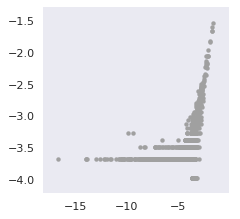

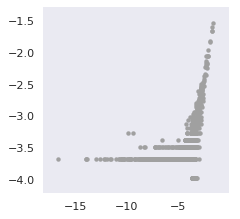

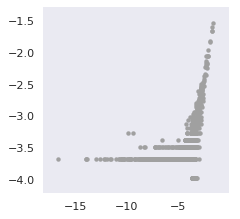

In [22]:
draw_correlation_scatter(x, y, figsize=(3, 3), xticks=None, yticks=None, \
                             xlim=None, ylim=None, r='pearsonr', ms=4, logd=False, \
                             xlab=None, ylab=None, filename=None, title=None,
                             color="#a0a0a0", grid=True, dpi=80, xticklabels=None,
                             add_identity=None, contour=False, axB=None)
plt.show()

In [28]:
fig,axB=plt.subplots()
strTrainFrac='None'
sample_name='HIP19089'
import time
cdate=str(time.strftime("%d%m%Y"))
cdate


df=insSeqProbsCompareNoDupThresh
x_var = 'calcFreqTrain'
y_var = 'TestSeqFreqLog'
filename = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_%s_%s_%s_%s' % (sample_name, strTrainFrac, x_var, y_var, cdate)
figExpToObsCorrel, axExpToObsCorrel, rExpToObsCorrel, pExpToObsCorrel = draw_correlation_scatter(df[x_var], df[y_var], figsize=(6, 6),
                         xticks=None, yticks=None, \
                             xlim=None, ylim=None, r='pearson', ms=4, logd=False, \
                             xlab=None, ylab=None, filename=filename,
                             title='xxx' ,
                             color="b", alpha=0.2, grid=True, dpi=300, xticklabels=None,
                            add_identity=True, contour=False, axB=axB)

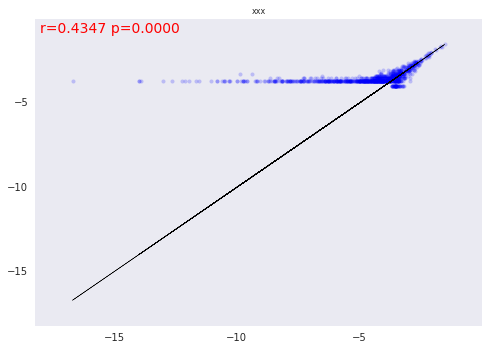

In [29]:
plt.show()

## to draw a correlation image for a sample - predicted by leave1out method vs. calculated:


In [38]:
def calcR_and_DrawScatter_leave1outAllSamplesMethod(sample_name):
    file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/expObsFreqDF_%s_Leave1Out' %sample_name
    expObsFreqDF_Leave1Out=pd.read_pickle(file1)
    from MyFunctionsShani import *
    #pickleFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/Alln1SeqsDFsmall'
    #AllnsSeqsDFsmall=pd.read_pickle(pickleFile)
    shortSampleName=sample_name.replace("HIP","")
    testSet=AllnsSeqsDFsmall[AllnsSeqsDFsmall.index==shortSampleName]
    threshold=calc_observed_value_thresh(testSet)
    insSeqProbsCompareNoDupThresh=expObsFreqDF_Leave1Out[(expObsFreqDF_Leave1Out['TestSeqFreqLog']>=threshold)|
                                                       (expObsFreqDF_Leave1Out['calcFreqTrain']>=threshold)]
    fig,axB=plt.subplots()
    strTrainFrac='None'
    import time
    cdate=str(time.strftime("%d%m%Y"))
    cdate


    df=insSeqProbsCompareNoDupThresh
    x_var = 'calcFreqTrain'
    y_var = 'TestSeqFreqLog'
    filename = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/leave1outmethod_%s_%s' %(sample_name, cdate)
    figExpToObsCorrel, axExpToObsCorrel, rExpToObsCorrel, pExpToObsCorrel = draw_correlation_scatter(df[x_var], df[y_var], figsize=(6, 6),
                             xticks=None, yticks=None, \
                                 xlim=None, ylim=None, r='pearson', ms=4, logd=False, \
                                 xlab=None, ylab=None, filename=filename,
                                 title='leave1outmethod_%s_%s' %(sample_name, cdate) ,
                                 color="b", alpha=0.2, grid=True, dpi=300, xticklabels=None,
                                add_identity=True, contour=False, axB=axB)
    fig.savefig(filename, dpi=80)
    
    

<ipython-input-38-a648ea43fb7a>:1: SyntaxWarning: import * only allowed at module level
  def calcR_and_DrawScatter_leave1outAllSamplesMethod(sample_name):


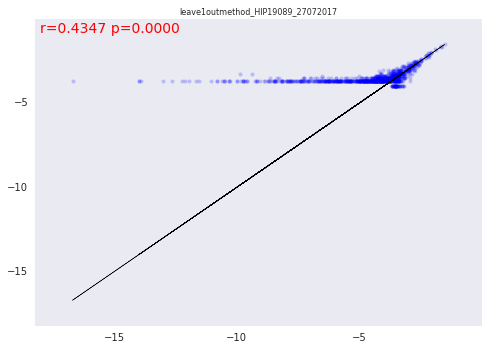

In [35]:
pickleFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/Alln1SeqsDFsmall'
AllnsSeqsDFsmall=pd.read_pickle(pickleFile)


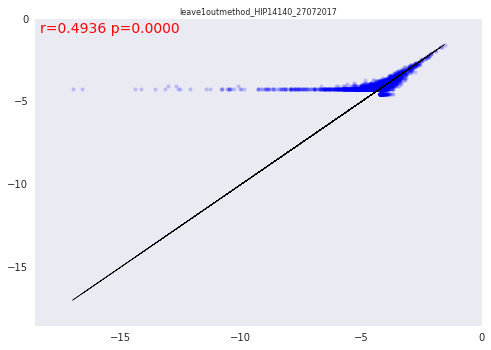

In [39]:
sample_name='HIP14140'
calcR_and_DrawScatter_leave1outAllSamplesMethod(sample_name)
plt.show()

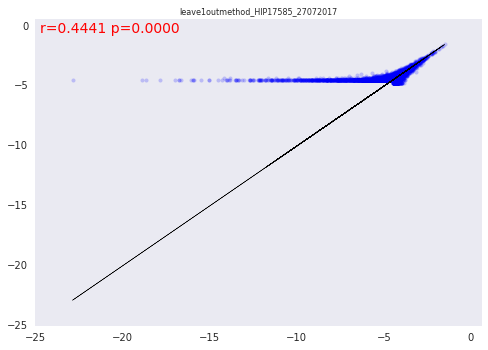

In [41]:
sample_name='HIP17585'
calcR_and_DrawScatter_leave1outAllSamplesMethod(sample_name)
plt.show()

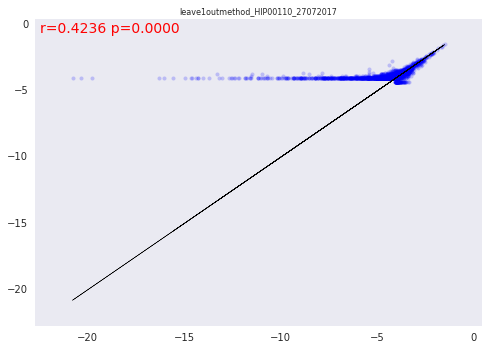

In [42]:
sample_name='HIP00110'
calcR_and_DrawScatter_leave1outAllSamplesMethod(sample_name)
plt.show()

## collect all ins1_betweenSamples_leave1OutMethod information and merge with ins1_within samples analysis:

## collect all ins2_withinSamples information and merge with ins1

## calculate correlations:

In [47]:
file1= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/ins1Prediction_AllSample_whenExist/calc_predictionPower_sampleByAllOthers_0_360'
ins1Prediction_AllSample_whenExist=pd.read_pickle(file1)

In [62]:
ins1Prediction_AllSample_whenExist.head()

,Sample,expected to observed frequency correlation p,expected to observed frequency correlation r
0,HIP11513,3.138401e-261,0.495145
1,HIP08200,6.146828e-121,0.439368
2,HIP00769,3.011744e-114,0.419910
3,HIP09122,4.675653e-173,0.435673
4,HIP12091,7.312158e-95,0.423300


In [55]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/ins1Prediction_AllSample'
ins1Prediction_betweenSamplesLeave1Out=concat_summarizing_dfs(dfs_folder)

number of dfs in directory: 76
the length of df list is 76


In [57]:
ins1Prediction_betweenSamplesLeave1Out_Complete=pd.concat([ins1Prediction_betweenSamplesLeave1Out,ins1Prediction_AllSample_whenExist])

In [64]:
#save to pickles and excel:

writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/SummarizingTables/ins1Prediction_betweenSamplesLeave1Out_Complete.xlsx'
ins1Prediction_betweenSamplesLeave1Out_Complete.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/SummarizingTables/ins1Prediction_betweenSamplesLeave1Out_Complete'
ins1Prediction_betweenSamplesLeave1Out_Complete.to_pickle(file1)

In [65]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins2PredictionAllSamples/calc_predictionPower_allSamples'
ins2_withinSamples_predictionDF=concat_summarizing_dfs(dfs_folder)

number of dfs in directory: 30
the length of df list is 30


In [67]:
#save to pickles and excel:

writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/SummarizingTables/ins2_withinSamples_predictionDF.xlsx'
ins2_withinSamples_predictionDF.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/SummarizingTables/ins2_withinSamples_predictionDF'
ins2_withinSamples_predictionDF.to_pickle(file1)

### MERGING SUMMARIZING TABLES:

In [70]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/ins1predictionDF_all_withTags.xlsx'
ins1predictionDF_all_withTags=pd.read_excel(file1)


In [91]:
merged_predictionPower_perSample=pd.merge(ins1predictionDF_all_withTags,ins1Prediction_betweenSamplesLeave1Out_Complete,
                                          how='inner', left_index=True, right_index=True)

In [92]:
merged_predictionPower_perSample.head()

,# nonProd unique seqeunces,expected to observed frequency correlation p_x,expected to observed frequency correlation r_x,train set fraction,Age,Gender,AgeGroup,expected to observed frequency correlation p_y,expected to observed frequency correlation r_y
Sample,,,,,,,,,
HIP13856,65339,3.005422e-73,0.527838,0.8,23.0,Male,adult,7.155578e-251,0.457034
HIP05942,52663,7.676425e-59,0.519545,0.8,34.0,Female,adult,1.761073e-194,0.445995
HIP13245,39425,5.119864e-30,0.422901,0.8,NaN,Male,NaN,1.096512e-136,0.414634
HIP14051,39375,2.739568e-51,0.548374,0.8,48.0,Male,adult,2.127564e-148,0.448402
HIP13796,61550,9.607278e-78,0.560566,0.8,41.0,Female,adult,6.621931e-230,0.459561


In [94]:
print len(merged_predictionPower_perSample)

587


In [78]:
ins1predictionDF_all_withTags.set_index('Sample', inplace=True)

In [81]:
ins1Prediction_betweenSamplesLeave1Out_Complete.set_index('Sample', inplace=True)

In [95]:
merged_predictionPower_perSample=pd.merge(merged_predictionPower_perSample,ins2_withinSamples_predictionDF, how='inner',
                                         left_index=True, right_index=True)

In [89]:
ins2_withinSamples_predictionDF.set_index('Sample', inplace=True)

In [100]:
merged_predictionPower_perSample=merged_predictionPower_perSample.rename(columns={'# nonProd unique seqeunces_x':'# nonProd unique seqeunces',
                                               'expected to observed frequency correlation p_x':'ins1_withinSamples_p',
                                                'expected to observed frequency correlation r_x':'ins1_withinSamples_r',
                                                'train set fraction_x': 'train set fraction',
                                                'expected to observed frequency correlation p_y': 'ins1_betweenSamples_p',
                                                'expected to observed frequency correlation r_y': 'ins1_betweenSamples_r',
                                                'expected to observed frequency correlation p':'ins2_withinSamples_p',
                                                 'expected to observed frequency correlation r':'ins2_withinSamples_r'})

In [103]:
merged_predictionPower_perSample.head()

,# nonProd unique seqeunces,ins1_withinSamples_p,ins1_withinSamples_r,train set fraction,Age,Gender,AgeGroup,ins1_betweenSamples_p,ins1_betweenSamples_r,ins2_withinSamples_p,ins2_withinSamples_r
Sample,,,,,,,,,,,
HIP13856,65339,3.005422e-73,0.527838,0.8,23.0,Male,adult,7.155578e-251,0.457034,1.305294e-72,0.527845
HIP05942,52663,7.676425e-59,0.519545,0.8,34.0,Female,adult,1.761073e-194,0.445995,8.969588e-65,0.543618
HIP13245,39425,5.119864e-30,0.422901,0.8,NaN,Male,NaN,1.096512e-136,0.414634,3.948615e-38,0.486707
HIP14051,39375,2.739568e-51,0.548374,0.8,48.0,Male,adult,2.127564e-148,0.448402,2.272495e-56,0.571269
HIP13796,61550,9.607278e-78,0.560566,0.8,41.0,Female,adult,6.621931e-230,0.459561,2.234840e-95,0.612114


In [102]:
merged_predictionPower_perSample=merged_predictionPower_perSample.drop(['# nonProd unique seqeunces_y','train set fraction_y'], axis=1)

In [66]:
#save to pickles and excel:

writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/merged_predictionPower_perSample.xlsx'
merged_predictionPower_perSample.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/merged_predictionPower_perSample'
merged_predictionPower_perSample.to_pickle(file1)

0.437768924468


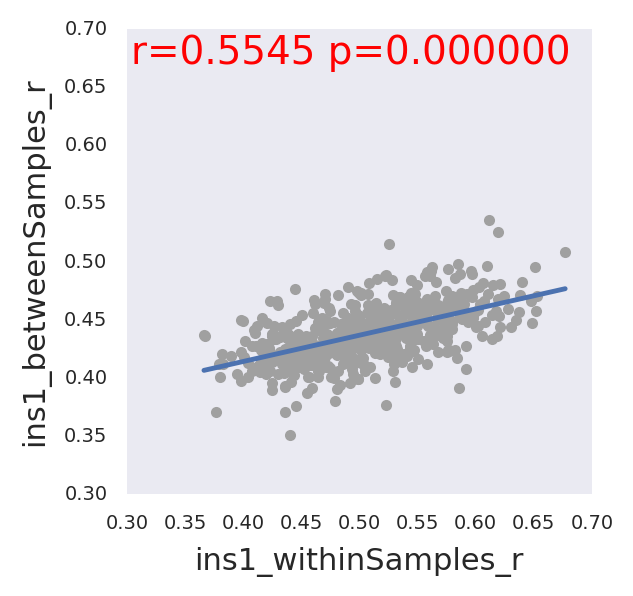

In [131]:
#plt correlation between ins1-within samples and ins1-between samples:

df=merged_predictionPower_perSample
x_var = 'ins1_withinSamples_r'
y_var = 'ins1_betweenSamples_r'

x=df[x_var]
y=df[y_var]
ymean=df[y_var].mean()
filename = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_%s_corr_allSamples' % (x_var, y_var)



draw_correlation_scatter(x, y, figsize = (3, 3), xticks=None, yticks=None,\
                             xlim = (0.3,0.7), ylim = (0.3,0.7), r = 'pearson', ms=4, logd = False,\
                             xlab = x_var, ylab = y_var, filename = filename, title = None,
                             color = "#a0a0a0", grid = True, dpi = 200, xticklabels = None, 
                             xticklabelsSize=7, yticklabelsSize=7, xticksAlign=90, contour = False)
# fit with np.polyfit
nx=np.isnan(x)
ny=np.isnan(y)
n=nx+ny
newx=list(x[~n])
newy=list(y[~n])
plt.plot(np.unique(newx), np.poly1d(np.polyfit(newx, newy, 1))(np.unique(newx)))
plt.plot(x=x,c='black', linewidth=4)


plt.show()



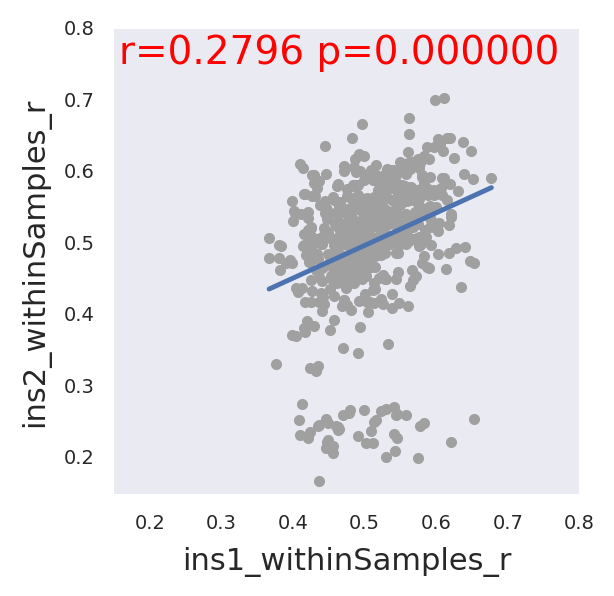

In [135]:
#plt correlation between ins1-within samples and ins1-between samples:

df=merged_predictionPower_perSample
x_var = 'ins1_withinSamples_r'
y_var = 'ins2_withinSamples_r'

x=df[x_var]
y=df[y_var]
ymean=df[y_var].mean()
filename = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_%s_corr_allSamples' % (x_var, y_var)



draw_correlation_scatter(x, y, figsize = (3, 3), xticks=None, yticks=None,\
                             xlim = (0.15,0.8), ylim = (0.15,0.8), r = 'pearson', ms=4, logd = False,\
                             xlab = x_var, ylab = y_var, filename = filename, title = None,
                             color = "#a0a0a0", grid = True, dpi = 200, xticklabels = None, 
                             xticklabelsSize=7, yticklabelsSize=7, xticksAlign=90, contour = False)
# fit with np.polyfit
nx=np.isnan(x)
ny=np.isnan(y)
n=nx+ny
newx=list(x[~n])
newy=list(y[~n])
plt.plot(np.unique(newx), np.poly1d(np.polyfit(newx, newy, 1))(np.unique(newx)))
plt.plot(x=x,c='black', linewidth=4)


plt.show()



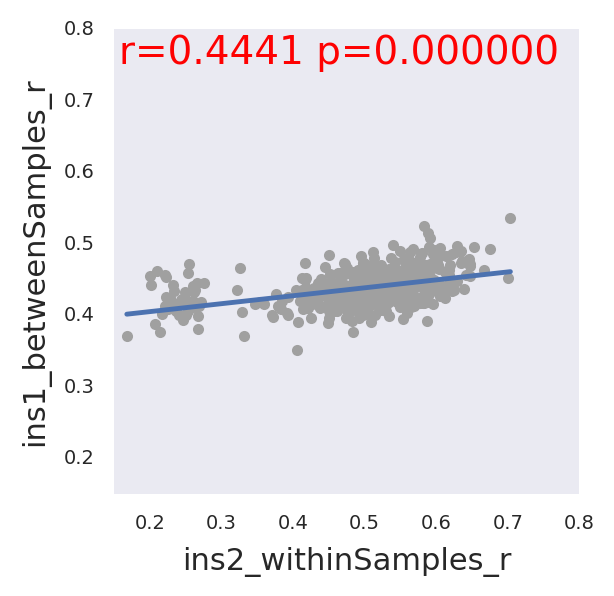

In [6]:
#plt correlation between ins1-within samples and ins1-between samples:

df=merged_predictionPower_perSample
x_var = 'ins2_withinSamples_r'
y_var = 'ins1_betweenSamples_r'

x=df[x_var]
y=df[y_var]
ymean=df[y_var].mean()
filename = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_%s_corr_allSamples' % (x_var, y_var)



draw_correlation_scatter_onePlotperFigure(x, y, figsize = (3, 3), xticks=None, yticks=None,\
                             xlim = (0.15,0.8), ylim = (0.15,0.8), r = 'pearson', ms=4, logd = False,\
                             xlab = x_var, ylab = y_var, filename = filename, title = None,
                             color = "#a0a0a0", grid = True, dpi = 200, xticklabels = None, 
                             xticklabelsSize=7, yticklabelsSize=7, xticksAlign=90, contour = False)
# fit with np.polyfit
nx=np.isnan(x)
ny=np.isnan(y)
n=nx+ny
newx=list(x[~n])
newy=list(y[~n])
plt.plot(np.unique(newx), np.poly1d(np.polyfit(newx, newy, 1))(np.unique(newx)))
plt.plot(x=x,c='black', linewidth=4)


plt.show()



In [10]:
pickleFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/Alln1SeqsDFsmall'
AllnsSeqsDFsmall=pd.read_pickle(pickleFile)

HIP13505
HIP13518
HIP01197
HIP10377


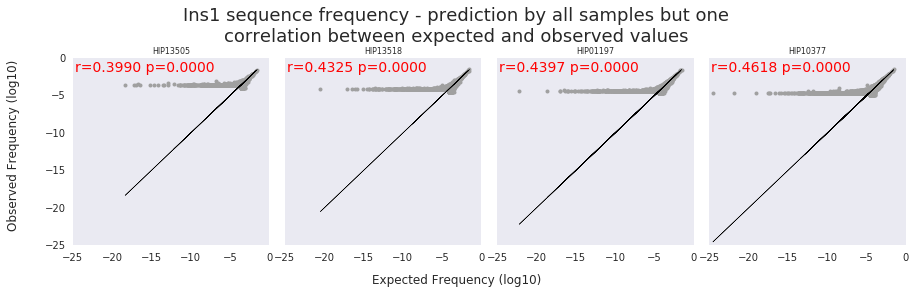

In [18]:
fig1, ((ax1, ax2,ax3,ax4))= plt.subplots(nrows=1,ncols=4,figsize=(13,4),sharex=True,sharey=True)
fig1.suptitle('Ins1 sequence frequency - prediction by all samples but one\ncorrelation between expected and observed values', fontsize=18)
axList=[ax1,ax2,ax3,ax4]



short_sample_list=['HIP13505','HIP13518','HIP01197','HIP10377']
count=0
for sample_name in short_sample_list:

    file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/Ins1_leave1Out_probabilitiesTables/expObsFreqDF_%s_Leave1Out' %sample_name
    expObsFreqDF_Leave1Out=pd.read_pickle(file1)
    from MyFunctionsShani import *

    shortSampleName=sample_name.replace("HIP","")
    testSet=AllnsSeqsDFsmall[AllnsSeqsDFsmall.index==shortSampleName]
    threshold=calc_observed_value_thresh(testSet)
    insSeqProbsCompareNoDupThresh=expObsFreqDF_Leave1Out[(expObsFreqDF_Leave1Out['TestSeqFreqLog']>=threshold)|
                                                       (expObsFreqDF_Leave1Out['calcFreqTrain']>=threshold)]
    


    df=insSeqProbsCompareNoDupThresh
    x_var = 'calcFreqTrain'
    y_var = 'TestSeqFreqLog'
    
    print sample_name
    axB=axList[count]
    
    
    df=insSeqProbsCompareNoDupThresh
    x_var = 'calcFreqTrain'
    y_var = 'TestSeqFreqLog'
    
    figExpToObsCorrel, axExpToObsCorrel, rExpToObsCorrel, pExpToObsCorrel = draw_correlation_scatter_forSubplots(x=df[x_var],
                            y=df[y_var], figsize=(3, 3), xticks=None, yticks=None, \
                             xlim=(-25,0), ylim=(-25,0), r='pearson', ms=4, logd=False, \
                             xlab=None, ylab=None, filename=None, title='%s' %sample_name,
                             color="#a0a0a0", grid=True, dpi=80, xticklabels=None,
                             add_identity=True, contour=False, axB=axB)
    axB.plot(x_var=x_var)
    count+=1
    
    
    
    
fig1.subplots_adjust(left=0.09, right=0.98, top=0.8, bottom=0.15, wspace=0.08,hspace=0.32)
fig1.text(0.5, 0.02, 'Expected Frequency (log10)', ha='center')
fig1.text(0.02, 0.5, 'Observed Frequency (log10)', va='center', rotation='vertical')

figFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Prediction_Correlation_Examples_ins1_betweenSamples_%s' %cdate
fig1.savefig(figFile, dpi=300) 
                                                                                                                 
plt.show()

/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


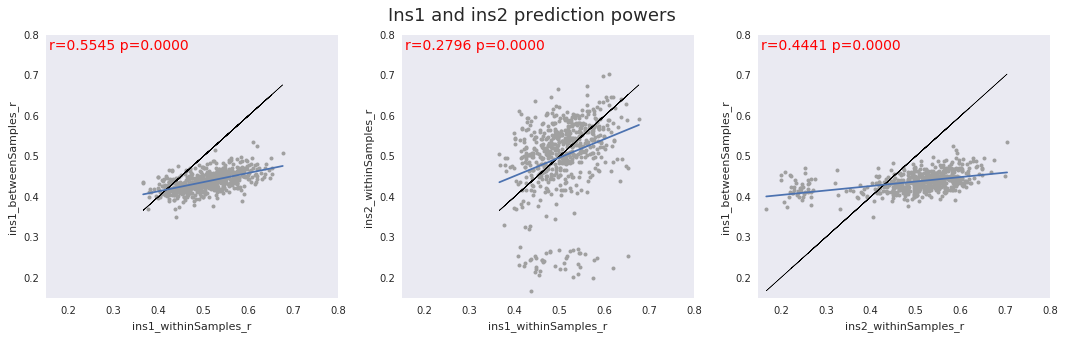

In [3]:
#plot correlations between ins1-within, ins1-between and ins2-within prediction powers


file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/merged_predictionPower_perSample'
merged_predictionPower_perSample=pd.read_pickle(file1)



fig1, ((ax1, ax2,ax3))= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig1.suptitle('Ins1 and ins2 prediction powers', fontsize=18)
axList=[ax1,ax2,ax3]




df=merged_predictionPower_perSample
x_var_list = ['ins1_withinSamples_r','ins1_withinSamples_r','ins2_withinSamples_r']
y_var_list = ['ins1_betweenSamples_r','ins2_withinSamples_r','ins1_betweenSamples_r']


for n in range(3):
    axB=axList[n]
    x_var=x_var_list[n]
    y_var=y_var_list[n]
    x=df[x_var]
    y=df[y_var]
    ymean=df[y_var].mean()
    
    figExpToObsCorrel, axExpToObsCorrel, rExpToObsCorrel, pExpToObsCorrel = draw_correlation_scatter_forSubplots(x=df[x_var],
                            y=df[y_var], figsize=(3, 3), xticks=None, yticks=None, \
                             xlim=(0.15,0.8), ylim=(0.15,0.8), r='pearson', ms=4, logd=False, \
                             xlab=x_var, ylab=y_var, filename=None, title=None,
                             c="#a0a0a0", grid=True, dpi=80, xticklabels=None,
                             add_identity=True, contour=False, axB=axB)
    
    # fit with np.polyfit
    nx=np.isnan(x)
    ny=np.isnan(y)
    n=nx+ny
    newx=list(x[~n])
    newy=list(y[~n])
    axB.plot(np.unique(newx), np.poly1d(np.polyfit(newx, newy, 1))(np.unique(newx)))
   
    
    
    
fig1.subplots_adjust(left=0.05, right=0.98, top=0.9, bottom=0.17, wspace=0.22,hspace=0.32)

figFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Ins1 and ins2 prediction powers'
fig1.savefig(figFile, dpi=300) 
                                                                                                                 
plt.show()

In [38]:
# Compare ins1-within, ins1-between and ins2-within prediction power:
NotnullData1=merged_predictionPower_perSample['ins1_withinSamples_r'][merged_predictionPower_perSample['ins1_withinSamples_r'].notnull()]

data1= merged_predictionPower_perSample[merged_predictionPower_perSample['ins1_withinSamples_r'].isnull()]
data2= merged_predictionPower_perSample['ins1_betweenSamples_r']
data3= merged_predictionPower_perSample['ins2_withinSamples_r']



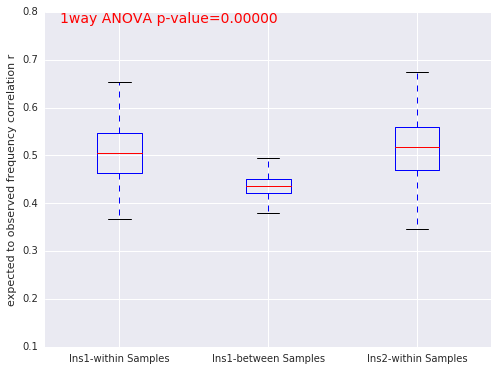

In [50]:


from scipy.stats import f_oneway


fig=plt.figure(figsize=(8,6))
plt.boxplot([NotnullData1, data2, data3])
plt.xticks([1,2,3], ['Ins1-within Samples','Ins1-between Samples','Ins2-within Samples'])
plt.ylabel('expected to observed frequency correlation r')
s,p=f_oneway(NotnullData1, data2, data3)
plt.text(0.6,0.8,"1way ANOVA p-value=%.5f" %p,  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/predictionPowerComparison_ins1ins1ins2'
fig.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


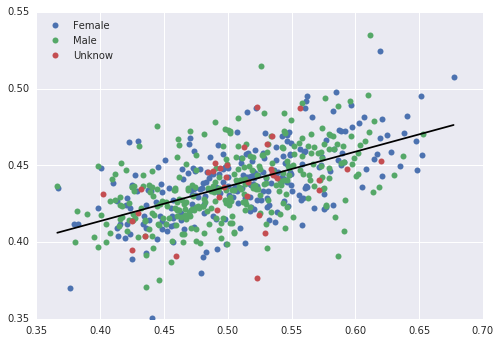

In [30]:
#plt correlation between ins1-within samples and ins1-between samples:
# ***color according to geneder***

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/merged_predictionPower_perSample'
merged_predictionPower_perSample=pd.read_pickle(file1)



df=merged_predictionPower_perSample
x_var = 'ins1_withinSamples_r'
y_var = 'ins1_betweenSamples_r'
category_var='Gender'

groups = df.groupby(category_var)

for name, group in groups:
    plt.plot(group[x_var], group[y_var], marker='o', linestyle='', ms=6, label=name)
plt.legend(loc=2)


# fit with np.polyfit
x=df[x_var]
y=df[y_var]


nx=np.isnan(x)
ny=np.isnan(y)
n=nx+ny
newx=list(x[~n])
newy=list(y[~n])
plt.plot(np.unique(newx), np.poly1d(np.polyfit(newx, newy, 1))(np.unique(newx)),c='black')
plt.plot(x=x,c='black', linewidth=4)




plt.show()



In [342]:
#plt correlation between ins1-within samples and ins1-between samples:
# ***color according to geneder***

def plot_scatter_with_category_colors(df,x_var,y_var,category,ax=None,figsize=(3,3)):
    
    df=df.dropna()
    from scipy.stats.mstats import zscore

    df['%s_zscore' %x_var]=zscore(df[x_var])*10+100
    df['%s_zscore' %y_var]=zscore(df[y_var])*10+100
    df['%s_%s_zscore ratio' %(x_var, y_var)]=df['%s_zscore' %x_var]/df['%s_zscore' %y_var]
    correl_ratios_normed_column='%s_%s_zscore ratio' %(x_var, y_var)

    fig = plt.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    groups = df.groupby(category)

    color_list = plt.cm.Set1(np.linspace(0, 1, 9))
    count=0


    data_list=[]
    name_list=[]
    for name,group in groups:
        ax.plot(group[x_var], group[y_var], marker='o', linestyle='', ms=6, label=name,c=color_list[count])
        count+=1
        if name!='Unknown':
            data=group[correl_ratios_normed_column]
            data_list.append(data)
            name_list.append(name)

    #ax.set_xlabel(x_var)
    #ax.set_ylabel(y_var)

    ax.legend(loc=1)


    # fit with np.polyfit
    x=df[x_var]
    y=df[y_var]


    nx=np.isnan(x)
    ny=np.isnan(y)
    n=nx+ny
    newx=list(x[~n])
    newy=list(y[~n])
    ax.plot(np.unique(newx), np.poly1d(np.polyfit(newx, newy, 1))(np.unique(newx)),c='black')
    ax.plot(x=x,c='black', linewidth=4)

    ylim=ax.get_ylim()
    ypos=ylim[1]
    xlim=ax.get_xlim()
    xpos=xlim[0]

    ax.set_title('%s' %category)



    if len(data_list)==2:
        s,p=ttest_ind(data_list[0],data_list[1])
        ax.text(xpos,ypos,"T test p-value=%.5f" %p,  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')

    elif len(data_list)>2:
        s,p=f_oneway(*data_list)
        ax.text(xpos,ypos,"1way ANOVA p-value=%.5f" %p,  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')
    
    return fig,ax








In [338]:
df=merged_predictionPower_perSample_withTags
x_var = 'ins1_withinSamples_r'
y_var = 'ins1_betweenSamples_r'
category='AgeGroup'

fig,ax1=plot_scatter_with_category_colors(df,x_var,y_var,category,ax=None)


filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s_%s_correlation' %(category, x_var,y_var)

fig.savefig(filename, dpi=200)


/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

2
Figure(576x396)


/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

2
Figure(576x396)
2
Figure(576x396)
2
Figure(576x396)
2
Figure(576x396)


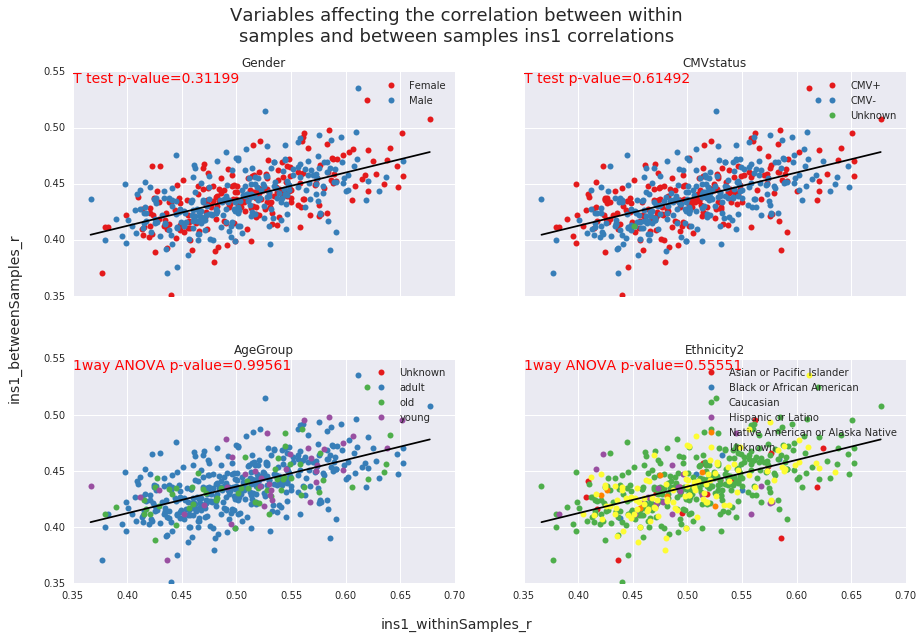

In [352]:
fig1, ((ax1, ax2),(ax3,ax4))= plt.subplots(nrows=2,ncols=2,figsize=(13,9),sharex=True,sharey=True)
fig1.suptitle('Variables affecting the correlation between within\nsamples and between samples ins1 correlations', fontsize=18)
axList=[ax1,ax2,ax3,ax4]
count=0


category_list=['Gender','CMVstatus','AgeGroup','Ethnicity2']
df=merged_predictionPower_perSample_withTags
x_var = 'ins1_withinSamples_r'
y_var = 'ins1_betweenSamples_r'

for category in category_list:
    category=category
    fig,ax=plot_scatter_with_category_colors(df,x_var,y_var,category,ax=axList[count])
    count+=1
    
fig1.subplots_adjust(left=0.09, right=0.98, top=0.88, bottom=0.09, wspace=0.18,hspace=0.28)
fig1.text(0.5, 0.02, x_var, ha='center',fontsize=14)
fig1.text(0.02, 0.5, y_var, va='center', rotation='vertical',fontsize=14)



filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Variables affecting the correlation between within nsamples and between samples ins1 correlations'
fig1.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

## check the affects of age, gender and other tags on ins1 and ins2 prediction power:

In [231]:
#check prediction power correlation with numeric tag:

def check_correlation_PredictionToTag(df,Tag,PredictionR,ax):
    
    if ax==None:
        fig,ax=plt.subplots()
    else:
        fig=None
    
    x=df[Tag]
    y=df[PredictionR]
   
    ymean=df[PredictionR].mean()                                                                                                                      
        
    ax.scatter(x,y)
    ax.set_xlabel(Tag)
    ax.set_xlabel(Tag,fontsize=12)
    ax.set_ylabel(PredictionR,fontsize=12)
    ylim=ax.get_ylim()
    ypos=ylim[1]
    xlim=ax.get_xlim()
    xpos=xlim[0]
    
    
    # fit with np.polyfit
    nx=np.isnan(x)
    ny=np.isnan(y)
    n=nx+ny
    newx=list(x[~n])
    newy=list(y[~n])
    ax.plot(np.unique(newx), np.poly1d(np.polyfit(newx, newy, 1))(np.unique(newx)),c='black')
    ax.plot(x=x,c='black', linewidth=4)
    ax.set_title('Correl_%s_to_%s' %(Tag,PredictionR),fontsize=14)
                                                                                                                        
                                                                                                                       
    from scipy.stats import pearsonr
    r,p = pearsonr(newx,newy)
    
    ax.text(xpos,ypos,"r=%.4f p=%.6f" %(r,p),  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')
                                                                                                                 
                                                                                                                        
    return fig,ax
    

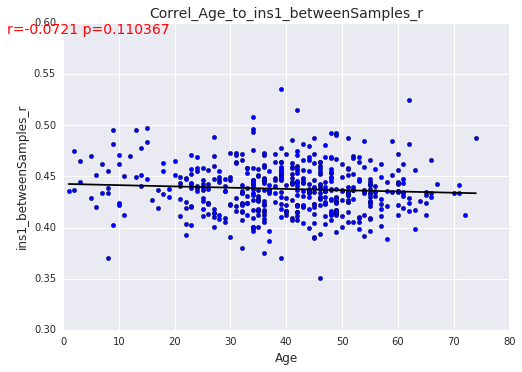

In [232]:

df=merged_predictionPower_perSample_withTags
Tag='Age'
PredictionR='ins1_betweenSamples_r'

fig, ax1=check_correlation_PredictionToTag(df,Tag,PredictionR,ax=None)
plt.xlim(0,80)

plt.show()
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Correl_%s_to_%s' %(Tag,PredictionR)

fig.savefig(filename, dpi=200)

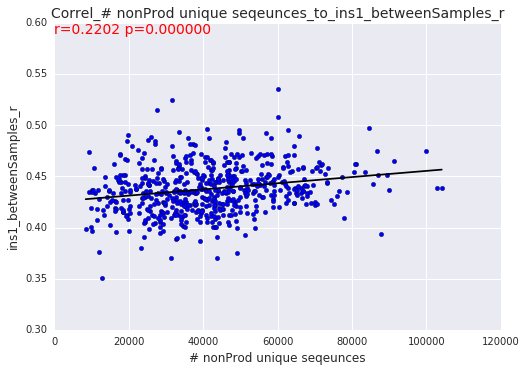

In [233]:

df=merged_predictionPower_perSample_withTags
Tag='# nonProd unique seqeunces'
PredictionR='ins1_betweenSamples_r'

fig, ax1=check_correlation_PredictionToTag(df,Tag,PredictionR,ax=None)

plt.show()
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Correl_%s_to_%s' %(Tag,PredictionR)

fig.savefig(filename, dpi=200)

In [234]:
def check_category_effect_on_PredictionR(df,category,PredictionR,ax):
    
    
    df=df.dropna()
    
    if ax==None:
        fig,ax=plt.subplots()
    else:
        fig=None
        
    groups = df.groupby(category)
    
    from scipy.stats import ttest_ind, f_oneway

    data_list=[]
    name_list=[]
    ticks_locations=range(1,len(groups)+1)
    for name,group in groups:
        if name!='Unknown':
            data=group[PredictionR]
            data_list.append(data)
            name_list.append(name)
    ticks_locations=range(1,len(name_list)+1)
    ax.boxplot(data_list)
    ax.set_xticklabels(name_list,rotation=45)
    ax.set_xlabel(category)
    ax.set_ylabel(PredictionR)

    ylim=ax.get_ylim()
    ypos=ylim[1]
    xlim=ax.get_xlim()
    xpos=xlim[0]
    
    ax.set_title('%s effect on %s' %(category,PredictionR),fontsize=14)



    if len(data_list)==2:
        t,p=ttest_ind(data_list[0],data_list[1])
        ax.text(xpos,ypos,"T test p-value=%.5f" %p,  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')
    elif len(data_list)>2:
        s,p=f_oneway(*data_list)
        ax.text(xpos,ypos,"1way ANOVA p-value=%.5f" %p,  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')
        
        
    return fig,ax

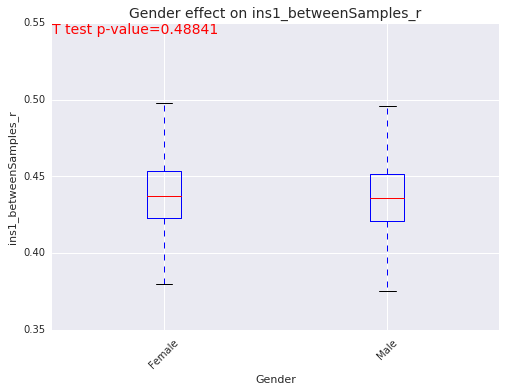

In [235]:
df=merged_predictionPower_perSample_withTags
category='Gender'
PredictionR='ins1_betweenSamples_r'

fig,ax=check_category_effect_on_PredictionR(df,category,PredictionR,ax=None)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s' %(category,PredictionR )
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()


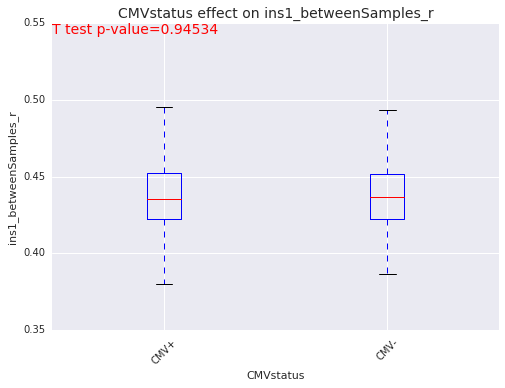

In [236]:
df=merged_predictionPower_perSample_withTags
category='CMVstatus'
PredictionR='ins1_betweenSamples_r'

fig,ax=check_category_effect_on_PredictionR(df,category,PredictionR,ax=None)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s' %(category,PredictionR )
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()


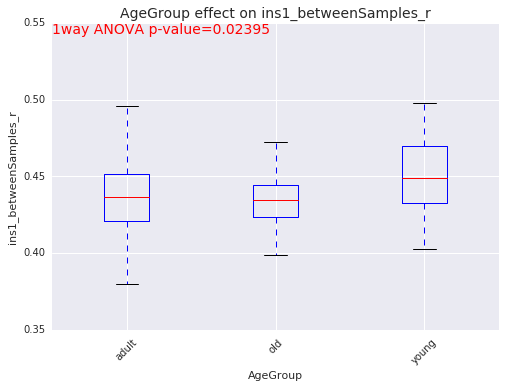

In [237]:
df=merged_predictionPower_perSample_withTags
category='AgeGroup'
PredictionR='ins1_betweenSamples_r'

fig,ax=check_category_effect_on_PredictionR(df,category,PredictionR,ax=None)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s' %(category,PredictionR )
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()


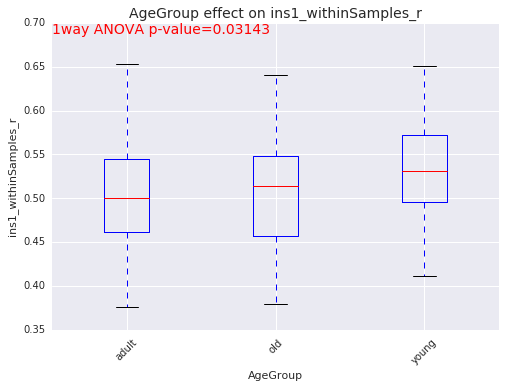

In [240]:
df=merged_predictionPower_perSample_withTags
category='AgeGroup'
PredictionR='ins1_withinSamples_r'

fig,ax=check_category_effect_on_PredictionR(df,category,PredictionR,ax=None)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s' %(category,PredictionR )
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()


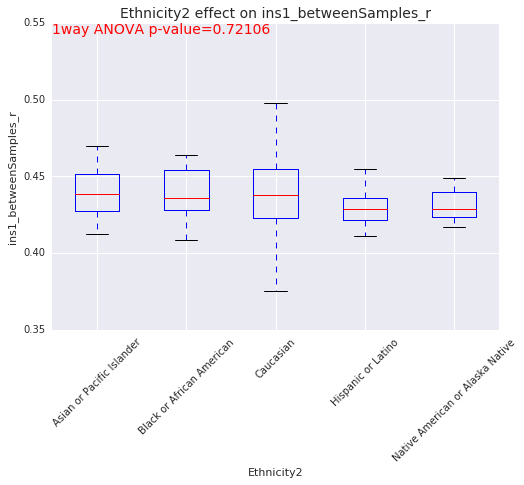

In [238]:
df=merged_predictionPower_perSample_withTags
category='Ethnicity2'
PredictionR='ins1_betweenSamples_r'

fig,ax=check_category_effect_on_PredictionR(df,category,PredictionR,ax=None)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s' %(category,PredictionR )
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()


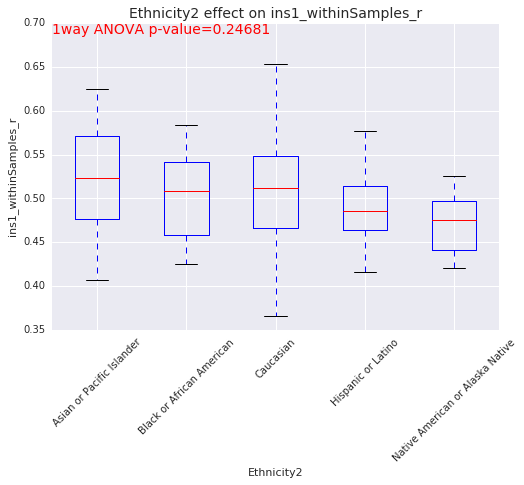

In [239]:
df=merged_predictionPower_perSample_withTags
category='Ethnicity2'
PredictionR='ins1_withinSamples_r'

fig,ax=check_category_effect_on_PredictionR(df,category,PredictionR,ax=None)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s' %(category,PredictionR )
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()


In [242]:
# checking correlations of ins2 prediction with age and sample size:
tags_list=['Age','# nonProd unique seqeunces']

for tag in tags_list:
    df=merged_predictionPower_perSample_withTags
    Tag=tag
    PredictionR='ins2_withinSamples_r'

    fig, ax1=check_correlation_PredictionToTag(df,Tag,PredictionR,ax=None)

    filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Correl_%s_to_%s' %(Tag,PredictionR)

    fig.savefig(filename, dpi=200)
    

In [244]:
# checking category effect on ins2 prediction for several categorial variables:
category_list=['Gender','CMVstatus','AgeGroup','Ethnicity2']

for category in category_list:
    df=merged_predictionPower_perSample_withTags
    category=category
    PredictionR='ins2_withinSamples_r'

    fig,ax=check_category_effect_on_PredictionR(df,category,PredictionR,ax=None)

    filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/%s_effect_on_%s' %(category,PredictionR )
    fig.savefig(filename, bbox_inches='tight', dpi = 200)
    




In [251]:
statistics=merged_predictionPower_perSample_withTags[['ins1_withinSamples_r','ins1_betweenSamples_r','ins2_withinSamples_r']].describe()
statistics

,ins1_withinSamples_r,ins1_betweenSamples_r,ins2_withinSamples_r
count,586.000000,587.000000,587.000000
mean,0.506558,0.437748,0.499826
std,0.058139,0.023685,0.094880
min,0.366350,0.350816,0.167462
25%,0.464336,0.422059,0.469352
50%,0.505109,0.436077,0.516775
75%,0.546254,0.451527,0.560432
max,0.677045,0.535107,0.703613


In [254]:
statisticsSmall=statistics.loc[['count','mean','std','min','50%','max'],:]

In [271]:
from pandas.plotting import table

df=np.round(statisticsSmall, 2)
fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, df, loc='upper right', colWidths=[0.2]*len(df.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table


plt.savefig('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/statisticsSmall2', transparent=True)


In [215]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/merged_predictionPower_perSample_withTags.xlsx'
merged_predictionPower_perSample_withTags=pd.read_excel(file1)

In [216]:
#save to pickles and excel:

writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/merged_predictionPower_perSample_withTags.xlsx'
merged_predictionPower_perSample_withTags.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SummarizingTables/merged_predictionPower_perSample_withTags'
merged_predictionPower_perSample_withTags.to_pickle(file1)